<a href="https://colab.research.google.com/github/prabhjot090601/forking-lesson/blob/main/Performance_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# **Batting EDA**

In [2]:
df_batting = pd.read_excel("Batting Stats.xlsx")

In [3]:
df_batting.sample(5)

,Game Id,Date,Time,game_id_2,overs,Player Name,Team Played For,Team Played Against,Batting Down/Position,Runs Scored,Balls Taken,Fours,Sixes,Strike Rate,Minutes Played,How Out,Out Against Bowler,Bowler Type,Bowler Profile
144,MCG 2 Cricket Ground,2023-07-01,07:48:00,MCG 2 Cricket Ground_45108_0.325,25,prabhjot,XI MUSKETEERS,STEEL ALPHAS,5.0,41.0,35.0,3.0,2.0,117.14,46.0,not out,NaN,NaN,NaN
225,"Greenfield Cricket Ground, Ghevra",2024-05-18,07:55:00,"Greenfield Cricket Ground, Ghevra_45430_0.3298...",20,prabhjot,SCZ 11,INEVITABLES X1,4.0,14.0,22.0,0.0,0.0,63.64,41.0,b,s. rana,Right-arm medium,https://cricheroes.com/player-profile/9411136/...
226,Ghevra Cricket Ground,2024-05-19,07:22:00,Ghevra Cricket Ground_45431_0.306944444444444,20,prabhjot singh sethi,SINGH'S XI,OLD SCHOOL CC,4.0,9.0,10.0,1.0,0.0,90.00,11.0,b,shivanand sachin,Right-arm Off Break,https://cricheroes.com/player-profile/3251460/...
134,3Cs Cricket Ground,2023-05-06,07:22:00,3Cs Cricket Ground_45052_0.306944444444444,20,prabhjot,KPMG GLOBAL SERVICES (KGS),BAAZI GAMES,4.0,16.0,17.0,1.0,0.0,94.12,29.0,run out,NaN,NaN,NaN
48,Janka puri Ground,2021-06-06,07:27:00,Janka puri Ground_44353_0.310416666666667,22,prabhjot,WEST DELHI CRICKET CLUB WDCC,PITCH SMASHERS DL,7.0,20.0,22.0,2.0,1.0,90.91,24.0,b,ashok,Right-arm Leg Break,https://cricheroes.com/player-profile/977440/a...


In [4]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Game Id                232 non-null    object        
 1   Date                   232 non-null    datetime64[ns]
 2   Time                   232 non-null    object        
 3   game_id_2              232 non-null    object        
 4   overs                  232 non-null    int64         
 5   Player Name            232 non-null    object        
 6   Team Played For        199 non-null    object        
 7   Team Played Against    199 non-null    object        
 8   Batting Down/Position  182 non-null    float64       
 9   Runs Scored            182 non-null    float64       
 10  Balls Taken            182 non-null    float64       
 11  Fours                  182 non-null    float64       
 12  Sixes                  182 non-null    float64       
 13  Strik

In [5]:
df_batting.rename(columns = {
    'Game Id' : 'game_id',
    'Date' : 'date',
    'Time' : 'time',
    'Player Name' : 'player_name',
    'Team Played For' : 'team_played_for',
    'Team Played Against' : 'team_played_against',
    'Batting Down/Position' : 'batting_down',
    'Runs Scored' : 'runs_scored',
    'Balls Taken' : 'balls_taken',
    'Fours' : 'fours',
    'Sixes' : 'sixes',
    'Strike Rate' : 'strike_rate',
    'Minutes Played' : 'minutes_played',
    'How Out' : 'how_out',
    'Out Against Bowler': 'out_against_bowler',
    'Bowler Type' : 'bowler_type',
    'Bowler Profile' : 'bowler_profile'
}, inplace = True)


In [6]:
df_batting.dropna(subset = ['team_played_for'], inplace = True)

In [7]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_id              199 non-null    object        
 1   date                 199 non-null    datetime64[ns]
 2   time                 199 non-null    object        
 3   game_id_2            199 non-null    object        
 4   overs                199 non-null    int64         
 5   player_name          199 non-null    object        
 6   team_played_for      199 non-null    object        
 7   team_played_against  199 non-null    object        
 8   batting_down         182 non-null    float64       
 9   runs_scored          182 non-null    float64       
 10  balls_taken          182 non-null    float64       
 11  fours                182 non-null    float64       
 12  sixes                182 non-null    float64       
 13  strike_rate          182 non-null    flo

**Batting Analytics**

In [8]:
df_batting['team_played_for'].value_counts()

,count
team_played_for,
WEST DELHI CRICKET CLUB WDCC,82
SCZ 11,15
SINGH'S XI,13
XI MUSKETEERS,7
BUTLERINS XI,6
WHITE WALKERS (XI),5
WEST DELHI CRICKET ACADEMY (HARINAGAR),5
THIRTY1 CRICKET CLUB,5
WEST TOWN PANTHERS,5


In [9]:
value_counts = df_batting['team_played_for'].value_counts()
value_counts.sum()

199

In [10]:
total_runs = df_batting['runs_scored'].sum()
total_runs

3515.0

In [11]:
fours = df_batting['fours'].sum()
fours

341.0

In [12]:
sixes = df_batting['sixes'].sum()
sixes

117.0

In [13]:
not_out_innings = df_batting[df_batting['how_out'] == 'not out'].shape[0]
not_out_innings

53

In [14]:
batting_average = df_batting['runs_scored'].sum()/(182 - 53)
batting_average

27.248062015503876

In [15]:
balls_faced = df_batting['balls_taken'].sum()
balls_faced

2874.0

In [16]:
strike_rate = (total_runs/balls_faced)*100
strike_rate

122.30340988169799

**The overview summary of the player statistics :**<br>
**1. Runs : 3515**<br>
**2. Batting Average : 27.24**<br>
**3. Strike Rate : 122.30**<br>
**4. Fours : 341**<br>
**5. Sixes : 117**<br></p>

We tend to judge a player at grassroot level by mere these statistics. However, if we consider the number of overs a player regularly plays or the batting position at which player regularly plays or the season he was at its prime and lowest and etc etc, we will be better in hold of the statistics as well as the technique a player possesses. <b> Lets further dive deep into statistics to actually see the granular details and help the player </b>

# **Statistics for a particular Team Played**

In [17]:
matches_per_team = df_batting['team_played_for'].value_counts()
matches_per_team

,count
team_played_for,
WEST DELHI CRICKET CLUB WDCC,82
SCZ 11,15
SINGH'S XI,13
XI MUSKETEERS,7
BUTLERINS XI,6
WHITE WALKERS (XI),5
WEST DELHI CRICKET ACADEMY (HARINAGAR),5
THIRTY1 CRICKET CLUB,5
WEST TOWN PANTHERS,5


In [18]:
matches_per_team.count()

39

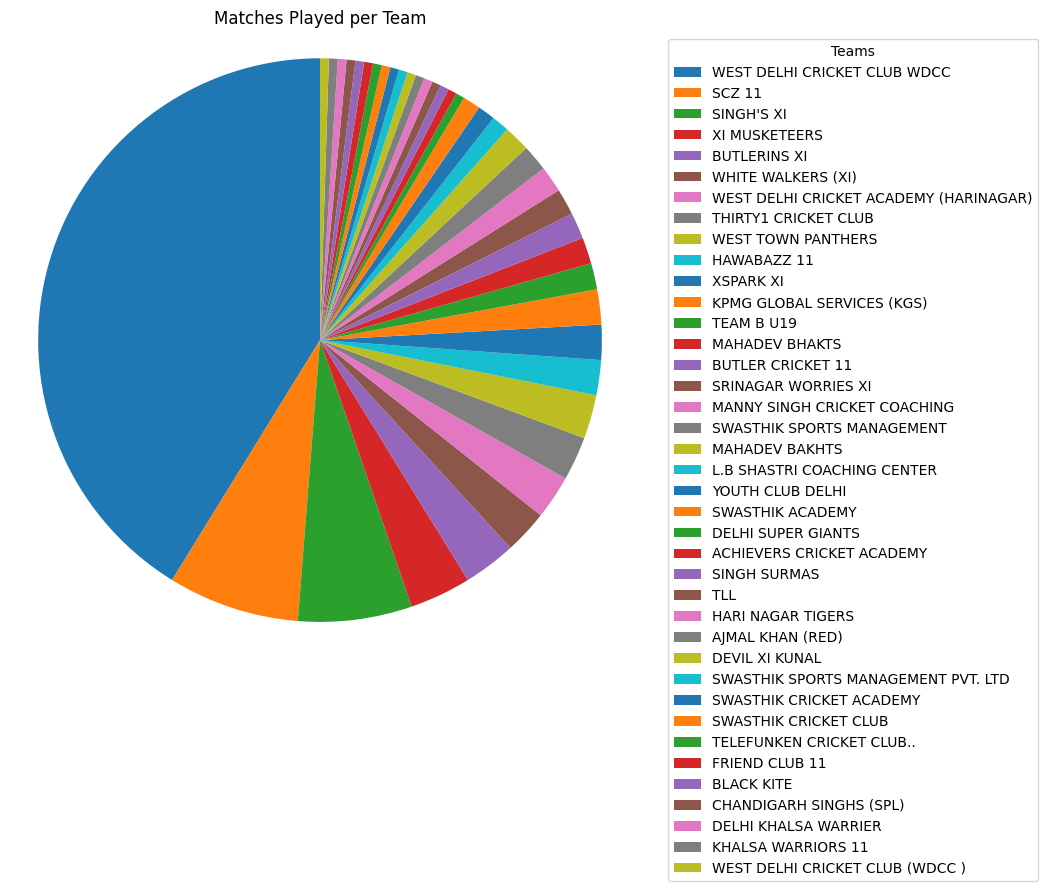

In [19]:
# Assuming matches_per_team is already created
matches_per_team = df_batting['team_played_for'].value_counts()

# Extracting the labels (team names) and sizes (match counts)
labels = matches_per_team.index
sizes = matches_per_team.values

# Plotting the pie chart without percentages
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(sizes, startangle=90)  # No autopct parameter

# Adding a legend with the team names
plt.legend(labels, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensuring the pie chart is a circle
plt.axis('equal')
plt.title('Matches Played per Team')
plt.show()

In [20]:
df_batting['innings'] = df_batting['how_out'].apply(lambda x: 0 if x == 'not out' else 1)
team_stats = df_batting.groupby('team_played_for').agg({
    'runs_scored': 'sum',
    'innings': 'sum'
})
team_stats['batting_average'] = team_stats['runs_scored'] / team_stats['innings']
print(team_stats[['batting_average']])


                                        batting_average
team_played_for                                        
ACHIEVERS CRICKET ACADEMY                      6.000000
AJMAL KHAN (RED)                              15.000000
BLACK KITE                                          NaN
BUTLER CRICKET 11                             21.000000
BUTLERINS XI                                  14.600000
CHANDIGARH SINGHS (SPL)                        1.000000
DELHI KHALSA WARRIER                                inf
DELHI SUPER GIANTS                             2.000000
DEVIL XI KUNAL                                20.000000
FRIEND CLUB 11                                      inf
HARI NAGAR TIGERS                             19.000000
HAWABAZZ 11                                   22.500000
KHALSA WARRIORS 11                            41.000000
KPMG GLOBAL SERVICES (KGS)                    29.250000
L.B SHASTRI COACHING CENTER                   11.500000
MAHADEV BAKHTS                                47

In [21]:
team_stats_sorted = team_stats.sort_values(by='batting_average')
team_stats_sorted


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,runs_scored,innings,batting_average
team_played_for,,,
SWASTHIK ACADEMY,2.0,2,1.000000
CHANDIGARH SINGHS (SPL),1.0,1,1.000000
DELHI SUPER GIANTS,2.0,1,2.000000
MANNY SINGH CRICKET COACHING,14.0,3,4.666667
ACHIEVERS CRICKET ACADEMY,6.0,1,6.000000
SWASTHIK SPORTS MANAGEMENT,12.0,2,6.000000
YOUTH CLUB DELHI,13.0,2,6.500000
WHITE WALKERS (XI),46.0,5,9.200000
SWASTHIK SPORTS MANAGEMENT PVT. LTD,10.0,1,10.000000


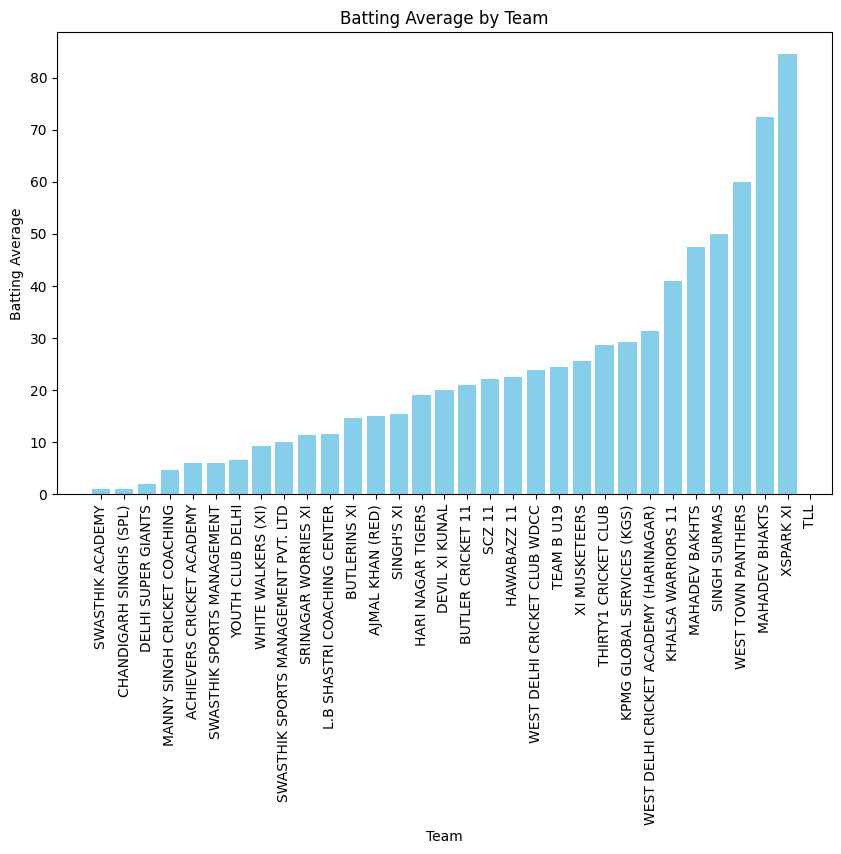

In [22]:
plt.figure(figsize = (10,6))
plt.bar(team_stats_sorted.index, team_stats_sorted['batting_average'], color='skyblue')

plt.title('Batting Average by Team')
plt.xlabel('Team')
plt.ylabel('Batting Average')

plt.xticks(rotation = 90)
plt.show()

If seen from hindsight, the player seems to be struggling with maintaining averages with different teams which can mean that he is treated differently within different teams in terms of pressure, batting down, relations with the captain and the role which is he playing in different teams which can be solved through talking directly to the player and understanding his psychology and thinking.

In [23]:
#Strike Rates Playing for Different teams

In [24]:
team_stats_strike_rate = df_batting.groupby('team_played_for').agg({
    'runs_scored': 'sum',
    'balls_taken': 'sum'
})

team_stats_strike_rate['strike_rate'] = (team_stats_strike_rate['runs_scored']/team_stats_strike_rate['balls_taken'])*100
team_stats_strike_rate_sorted = team_stats_strike_rate.sort_values(by = 'strike_rate')

In [25]:
team_stats_strike_rate_sorted['strike_rate']

,strike_rate
team_played_for,
BLACK KITE,0.000000
SWASTHIK CRICKET ACADEMY,0.000000
CHANDIGARH SINGHS (SPL),16.666667
SWASTHIK ACADEMY,16.666667
DELHI SUPER GIANTS,33.333333
SWASTHIK SPORTS MANAGEMENT,41.379310
L.B SHASTRI COACHING CENTER,43.396226
AJMAL KHAN (RED),75.000000
DELHI KHALSA WARRIER,80.000000


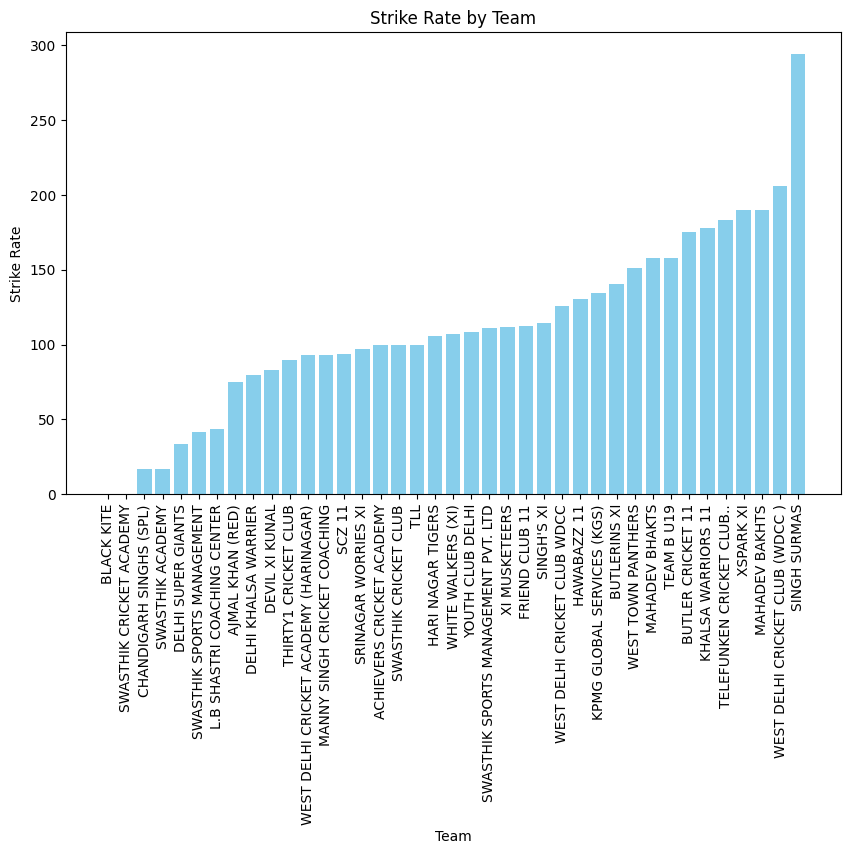

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(team_stats_strike_rate_sorted.index, team_stats_strike_rate_sorted['strike_rate'], color='skyblue')

plt.title('Strike Rate by Team')
plt.xlabel('Team')
plt.ylabel('Strike Rate')

plt.xticks(rotation=90)

plt.show()

The same story is depicted when we aim to study the strike rates with different teams. This can mean that the player feels different sort of pressures or has a different role and responsibilty for different teams. Also, an issue can persist related to format of the game with different situations. <b> Let's dive deeper into more granular data </b>

# **Format wise performance**

In [27]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_id              199 non-null    object        
 1   date                 199 non-null    datetime64[ns]
 2   time                 199 non-null    object        
 3   game_id_2            199 non-null    object        
 4   overs                199 non-null    int64         
 5   player_name          199 non-null    object        
 6   team_played_for      199 non-null    object        
 7   team_played_against  199 non-null    object        
 8   batting_down         182 non-null    float64       
 9   runs_scored          182 non-null    float64       
 10  balls_taken          182 non-null    float64       
 11  fours                182 non-null    float64       
 12  sixes                182 non-null    float64       
 13  strike_rate          182 non-null    flo

In [28]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,balls_taken,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,18.0,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,23.0,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1


In [29]:
over_values = df_batting['overs'].value_counts()
over_values

,count
overs,
25,59
20,54
22,45
40,20
30,12
35,4
45,2
23,2
12,1


In [30]:
batting_per_format = df_batting.groupby('overs').agg({
    'runs_scored' : 'sum',
    'balls_taken' : 'sum',
    'innings' : 'sum'

})
batting_per_format

,runs_scored,balls_taken,innings
overs,,,
12,50.0,17.0,1
20,1111.0,834.0,42
22,815.0,580.0,32
23,49.0,29.0,2
25,1000.0,882.0,41
30,199.0,165.0,8
35,95.0,105.0,4
40,196.0,258.0,14
45,0.0,4.0,2


The player has played most of his matches in short formats i.e. 20, 22, 25 overs which means an average around 30 in these formats will be considered a decent batting average. And when had a conversation with the player, he was professional playing for past 10 years, but the matches are way too less according to that.

In [31]:
average_per_format = batting_per_format['runs_scored']/batting_per_format['innings']
average_per_format

,0
overs,
12,50.000000
20,26.452381
22,25.468750
23,24.500000
25,24.390244
30,24.875000
35,23.750000
40,14.000000
45,0.000000


In [32]:
strike_rate_per_format = (batting_per_format['runs_scored']/batting_per_format['balls_taken'])*100
strike_rate_per_format


,0
overs,
12,294.117647
20,133.213429
22,140.517241
23,168.965517
25,113.378685
30,120.606061
35,90.476190
40,75.968992
45,0.000000


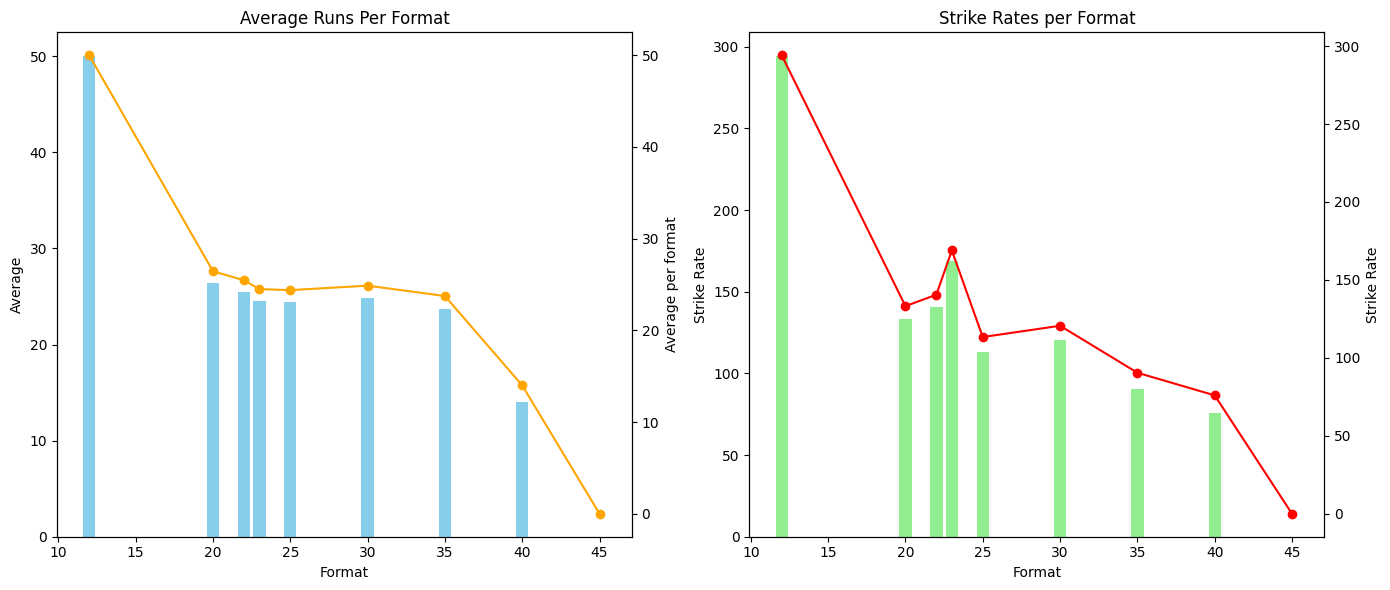

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Plot for Average Runs per format
ax1.bar(average_per_format.index, average_per_format.values, color='skyblue')
ax1.set_title('Average Runs Per Format')
ax1.set_xlabel('Format')
ax1.set_ylabel('Average')

ax1_line = ax1.twinx()
ax1_line.plot(average_per_format.index, average_per_format.values, color='orange', marker='o', linestyle='-', label='Average per format')
ax1_line.set_ylabel('Average per format')

# Plot for Strike Rates per Format
ax2.bar(strike_rate_per_format.index, strike_rate_per_format.values, color='lightgreen')
ax2.set_title('Strike Rates per Format')
ax2.set_xlabel('Format')
ax2.set_ylabel('Strike Rate')

ax2_line = ax2.twinx()
ax2_line.plot(strike_rate_per_format.index, strike_rate_per_format.values, color='red', marker='o', linestyle='-', label='Strike Rate')
ax2_line.set_ylabel('Strike Rate')

plt.tight_layout()
plt.show()


If we look at the average and strike rates per the format of the game, it will depict that the player averages around 24-28 in most of the formats and strike rates show that player plays according to the situation and formats of the games.

Still, this won't give a clear picture of the player's potential as we have to dive deeper as to which position is the player actually batting.

Also, we have to see the form of the player to correctly gauge him and provide him solutions to and for his game

# **Year on Year Performance**

In [34]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,balls_taken,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,18.0,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,23.0,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1


In [35]:
df_batting['date'] = pd.to_datetime(df_batting['date'])
df_batting['year'] = df_batting['date'].dt.year

In [36]:
yearly_stats = df_batting.groupby('year').agg(
    {
        'runs_scored' : 'sum',
        'strike_rate' : 'mean',
        'innings' : 'sum'
    }
)

yearly_stats['batting_average'] = yearly_stats['runs_scored']/yearly_stats['innings']

yearly_stats

,runs_scored,strike_rate,innings,batting_average
year,,,,
2018,19.0,105.560000,1,19.000000
2019,152.0,87.785714,5,30.400000
2020,150.0,100.923077,7,21.428571
2021,475.0,99.288286,28,16.964286
2022,959.0,119.104884,36,26.638889
2023,1102.0,115.350377,46,23.956522
2024,658.0,109.102667,23,28.608696


In [74]:
# List of specific over formats you're interested in
over_formats = [20, 22, 23, 25, 30, 35, 40, 45]

# Create a column for each over format and count the matches played in that format
for over in over_formats:
    df_batting[f'{over}_over_matches'] = (df_batting['overs'] == over).astype(int)

# Group by year and sum the counts for each format
formats_by_year = df_batting.groupby('year')[[f'{over}_over_matches' for over in over_formats]].sum()

# Aggregate the yearly stats as before
yearly_stats = df_batting.groupby('year').agg(
    {
        'runs_scored' : 'sum',
        'strike_rate' : 'mean',
        'innings' : 'sum'
    }
)

yearly_stats['batting_average'] = yearly_stats['runs_scored'] / yearly_stats['innings']

# Combine the yearly stats with the formats count
yearly_stats = yearly_stats.join(formats_by_year)

# Display the result
yearly_stats


,runs_scored,strike_rate,innings,batting_average,20_over_matches,22_over_matches,23_over_matches,25_over_matches,30_over_matches,35_over_matches,40_over_matches,45_over_matches
year,,,,,,,,,,,,
2018,19.0,105.560000,1,19.000000,0,0,0,0,0,0,1,0
2019,152.0,87.785714,5,30.400000,3,0,0,0,5,0,0,0
2020,150.0,100.923077,7,21.428571,5,0,0,5,0,0,3,0
2021,475.0,99.288286,28,16.964286,4,7,0,13,5,0,9,0
2022,959.0,119.104884,36,26.638889,8,12,0,21,2,1,2,2
2023,1102.0,115.350377,46,23.956522,18,21,2,16,0,1,1,0
2024,658.0,109.102667,23,28.608696,16,5,0,4,0,2,4,0


If seen year on year performance, the player saw a low phase during 2021 phase and for every other year, he had an average above 20 and also a strike rate above 100.

As an allrounder who has played mostly T20's, it is an average performance which can be improved, but also the player needs to have a converation with.

Still, the complete picture about the player is incomplete as still we need to have a look at batting position of the player as when talked he said he is playing as a floater which means we have to deep dive into his batting position and understand more about it.....

# **Performace by Batting Position Overall**

In [37]:
df_batting.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_id              199 non-null    object        
 1   date                 199 non-null    datetime64[ns]
 2   time                 199 non-null    object        
 3   game_id_2            199 non-null    object        
 4   overs                199 non-null    int64         
 5   player_name          199 non-null    object        
 6   team_played_for      199 non-null    object        
 7   team_played_against  199 non-null    object        
 8   batting_down         182 non-null    float64       
 9   runs_scored          182 non-null    float64       
 10  balls_taken          182 non-null    float64       
 11  fours                182 non-null    float64       
 12  sixes                182 non-null    float64       
 13  strike_rate          182 non-null    flo

In [38]:
df_batting['batting_down'].value_counts()

,count
batting_down,
8.0,36
7.0,33
5.0,24
6.0,23
4.0,21
9.0,17
2.0,9
10.0,9
11.0,5


In [39]:
df_batting['batting_down'].value_counts().sum()

182

In [80]:
batting_down_analytics = df_batting.groupby('batting_down').agg(
    {
        'runs_scored' : 'sum',
        'balls_taken' : 'sum',
        'innings' : 'sum'
    }
)

batting_down_analytics['batting_average'] = batting_down_analytics['runs_scored']/batting_down_analytics['innings']
batting_down_analytics['strike_rate'] = (batting_down_analytics['runs_scored']/batting_down_analytics['balls_taken'])*100
batting_down_analytics

,runs_scored,balls_taken,innings,batting_average,strike_rate
batting_down,,,,,
1.0,62.0,35.0,1,62.000000,177.142857
2.0,221.0,202.0,9,24.555556,109.405941
3.0,82.0,90.0,4,20.500000,91.111111
4.0,643.0,490.0,19,33.842105,131.224490
5.0,533.0,411.0,16,33.312500,129.683698
6.0,381.0,350.0,18,21.166667,108.857143
7.0,731.0,526.0,23,31.782609,138.973384
8.0,539.0,486.0,23,23.434783,110.905350
9.0,222.0,198.0,12,18.500000,112.121212


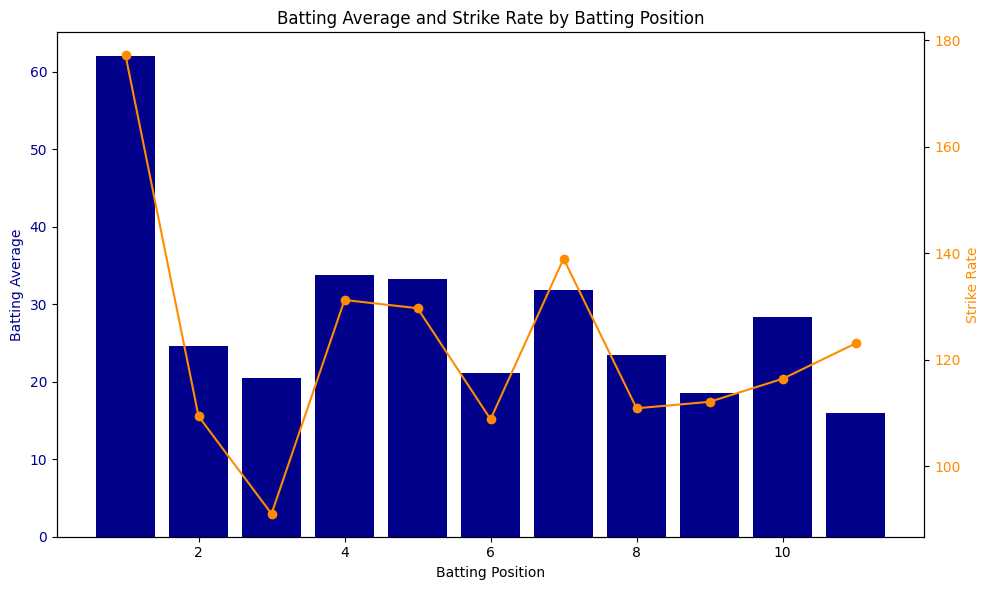

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Batting Average in dark blue
ax1.bar(batting_down_analytics.index, batting_down_analytics['batting_average'], color='darkblue', label='Batting Average')
ax1.set_xlabel('Batting Position')
ax1.set_ylabel('Batting Average', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Create a secondary y-axis for Strike Rate
ax2 = ax1.twinx()

# Line plot for Strike Rate in light green
ax2.plot(batting_down_analytics.index, batting_down_analytics['strike_rate'], color='darkorange', marker='o', linestyle='-', label='Strike Rate')
ax2.set_ylabel('Strike Rate', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Title and layout
plt.title('Batting Average and Strike Rate by Batting Position')
plt.tight_layout()

# Show the plot
plt.show()

Guess what, contrary to the analytics we just did above, the batting down/position of the batsman potrays a contrasting picture. It suggests that player is not average, it actually suggests that player is underutilised or not given a proper position to bat upon. The stats suggest that player likes to have either complete responsibility of the team or wants to play freely which is shown upon his opening and 2,3 & 5 down batting positions and strike rates he carries with it.The picture here comes in complete contrast, so we have to further dive and explore relationships between the formats and batting downs, year on year performance and batting downs, team played for and batting downs etc

# **Base of Relationship Between Batting Downs, Teams the Player played for & Formats**

In [42]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,...,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings,year
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,...,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1,2018
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,...,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1,2019


In [43]:
# Step 1: Group by 'batting_down', 'team_played_for', and 'overs', then calculate the total runs scored
total_runs = df_batting.groupby(['batting_down', 'team_played_for', 'overs'])['runs_scored'].sum()

# Step 2: Calculate the number of innings for each group
innings_df = df_batting.groupby(['batting_down', 'team_played_for', 'overs']).size()

# Step 3: Group the 'innings' column by the same keys
innings_out_no = df_batting.groupby(['batting_down', 'team_played_for', 'overs'])['innings'].sum()

# Step 4: Calculate the batting average (total runs / number of innings)
batting_average = total_runs / innings_out_no

# Step 5: Calculate the total balls taken for each group
total_balls = df_batting.groupby(['batting_down', 'team_played_for', 'overs'])['balls_taken'].sum()

# Step 6: Calculate the strike rate (runs scored / balls taken) * 100
strike_rate = (total_runs / total_balls) * 100

# Step 7: Combine all results into a single DataFrame
down_team_relation = pd.DataFrame({
    'Total Runs Scored': total_runs,
    'Number of Innings': innings_df,
    'Batting Average': batting_average,
    'Innings_out_no': innings_out_no,
    'Total Balls Taken': total_balls,
    'Strike Rate': strike_rate
}).reset_index()

# View the resulting DataFrame
pd.set_option('display.max_rows', 110)

down_team_relation.style.set_table_attributes('style="border-collapse:collapse"').hide(axis="index")
down_team_relation.head(5)




/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,batting_down,team_played_for,overs,Total Runs Scored,Number of Innings,Batting Average,Innings_out_no,Total Balls Taken,Strike Rate
0,1.0,WEST DELHI CRICKET CLUB WDCC,25,62.0,1,62.0,1,35.0,177.142857
1,2.0,CHANDIGARH SINGHS (SPL),20,1.0,1,1.0,1,6.0,16.666667
2,2.0,TEAM B U19,20,49.0,1,49.0,1,29.0,168.965517
3,2.0,WEST DELHI CRICKET ACADEMY (HARINAGAR),30,26.0,2,13.0,2,46.0,56.521739
4,2.0,WEST DELHI CRICKET CLUB WDCC,20,51.0,2,25.5,2,38.0,134.210526


In [44]:
grouped_down_team_relation = down_team_relation.groupby('overs')[['team_played_for','batting_down', 'overs', 'Innings_out_no','Number of Innings','Batting Average', 'Strike Rate', 'Total Runs Scored']].apply(lambda x: x)
grouped_down_team_relation.head(5)


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


team_played_for  batting_down  overs  Innings_out_no  \
overs                                                                         
12    16                  SINGH SURMAS           4.0     12               1   
20    1        CHANDIGARH SINGHS (SPL)           2.0     20               1   
      2                     TEAM B U19           2.0     20               1   
      4   WEST DELHI CRICKET CLUB WDCC           2.0     20               2   
      10            DELHI SUPER GIANTS           4.0     20               1   

          Number of Innings  Batting Average  Strike Rate  Total Runs Scored  
overs                                                                         
12    16                  1             50.0   294.117647               50.0  
20    1                   1              1.0    16.666667                1.0  
      2                   1             49.0   168.965517               49.0  
      4                   2             25.5   134.210526               51.0  
      10                  1              2.0    33.333333                2.0

# **Batting Averages & Strike Rates by overs and batting positions**

In [45]:
# List of overs to iterate through
overs_list = [12, 20, 22, 23, 25, 30, 35, 40, 45]

# Dictionary to store the DataFrames
dataframes = {}

for overs in overs_list:
    # Step 1: Filter for the current overs value
    filtered_df = grouped_down_team_relation[grouped_down_team_relation['overs'] == overs]

    # Step 2: Sort by 'Batting Average' in descending order
    sorted_df = filtered_df.sort_values(by='Batting Average', ascending=False)

    # Step 3: Select the columns you are interested in
    sorted_batting_averages = sorted_df[['team_played_for', 'batting_down', 'Innings_out_no', 'Number of Innings', 'Batting Average', 'Strike Rate', 'Total Runs Scored']]

    # Replace inf and -inf with the mean of finite values
    finite_mean = sorted_batting_averages.loc[~sorted_batting_averages['Batting Average'].isin([np.inf, -np.inf]), 'Batting Average'].mean()
    sorted_batting_averages['Batting Average'] = sorted_batting_averages['Batting Average'].replace([np.inf, -np.inf], finite_mean)

    # Step 4: Group by 'batting_down' and perform aggregation
    grouped_averages = sorted_batting_averages.groupby('batting_down').agg({
        'Batting Average' : 'mean',
        'Strike Rate' : 'mean',
        'Total Runs Scored' : 'sum',
        'Number of Innings' : 'sum'
    })

    # Store each DataFrame in the dictionary with the overs as the key
    dataframes[f'{overs}_overs'] = grouped_averages

# Display each DataFrame in the notebook
for overs, df in dataframes.items():
    print(f"\nDataFrame for {overs} Overs:\n")
    display(df)



DataFrame for 12_overs Overs:



<ipython-input-45-34a3d8dcf700>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_batting_averages['Batting Average'] = sorted_batting_averages['Batting Average'].replace([np.inf, -np.inf], finite_mean)
<ipython-input-45-34a3d8dcf700>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_batting_averages['Batting Average'] = sorted_batting_averages['Batting Average'].replace([np.inf, -np.inf], finite_mean)
<ipython-input-45-34a3d8dcf700>:19: SettingWithCopyWarning: 
A value is trying to be set on 

,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
4.0,50.0,294.117647,50.0,1



DataFrame for 20_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
2.0,25.166667,106.614237,101.0,4
4.0,40.604167,102.221867,404.0,13
5.0,21.261494,112.360784,190.0,8
6.0,13.568247,81.424979,118.0,9
7.0,26.848659,154.805930,193.0,7
8.0,18.500000,130.357143,37.0,3
9.0,14.181992,148.000000,42.0,4
10.0,24.545977,138.461538,26.0,2



DataFrame for 22_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
2.0,31.333333,113.253012,94.0,3
3.0,35.000000,102.941176,35.0,1
4.0,27.000000,101.764706,54.0,2
5.0,22.728423,133.453947,108.0,5
6.0,16.304563,117.853457,54.0,3
7.0,19.346230,118.923611,355.0,13
8.0,30.333333,197.826087,91.0,8
9.0,7.000000,70.000000,7.0,2
10.0,17.000000,94.444444,17.0,1



DataFrame for 23_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
3.0,0.0,0.0,0.0,1
6.0,49.0,175.0,49.0,1



DataFrame for 25_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
1.0,62.000000,177.142857,62.0,1
3.0,8.000000,80.000000,8.0,1
4.0,30.875000,119.115628,135.0,5
5.0,24.000000,77.030519,193.0,9
6.0,34.500000,112.142857,137.0,7
7.0,17.222222,105.354090,135.0,9
8.0,24.277778,122.337444,261.0,15
9.0,15.250000,105.172414,61.0,6
10.0,26.498677,88.888889,8.0,2



DataFrame for 30_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
2.0,13.00,56.521739,26.0,2
5.0,11.25,167.857143,42.0,2
7.0,13.50,100.000000,6.0,1
8.0,16.00,160.476190,59.0,3
9.0,13.50,126.530612,62.0,1
10.0,13.50,133.333333,4.0,1



DataFrame for 35_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
3.0,39.0,86.666667,39.0,1
7.0,42.0,89.361702,42.0,1
9.0,6.0,100.000000,6.0,1
10.0,8.0,114.285714,8.0,1



DataFrame for 40_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
6.0,11.500000,43.396226,23.0,2
7.0,0.000000,0.000000,0.0,1
8.0,20.227273,72.188780,91.0,7
9.0,14.666667,97.222222,44.0,3
10.0,13.568182,110.416667,22.0,2
11.0,9.424242,116.666667,16.0,4



DataFrame for 45_overs Overs:



,Batting Average,Strike Rate,Total Runs Scored,Number of Innings
batting_down,,,,
6.0,0.0,0.0,0.0,1
7.0,0.0,0.0,0.0,1


<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


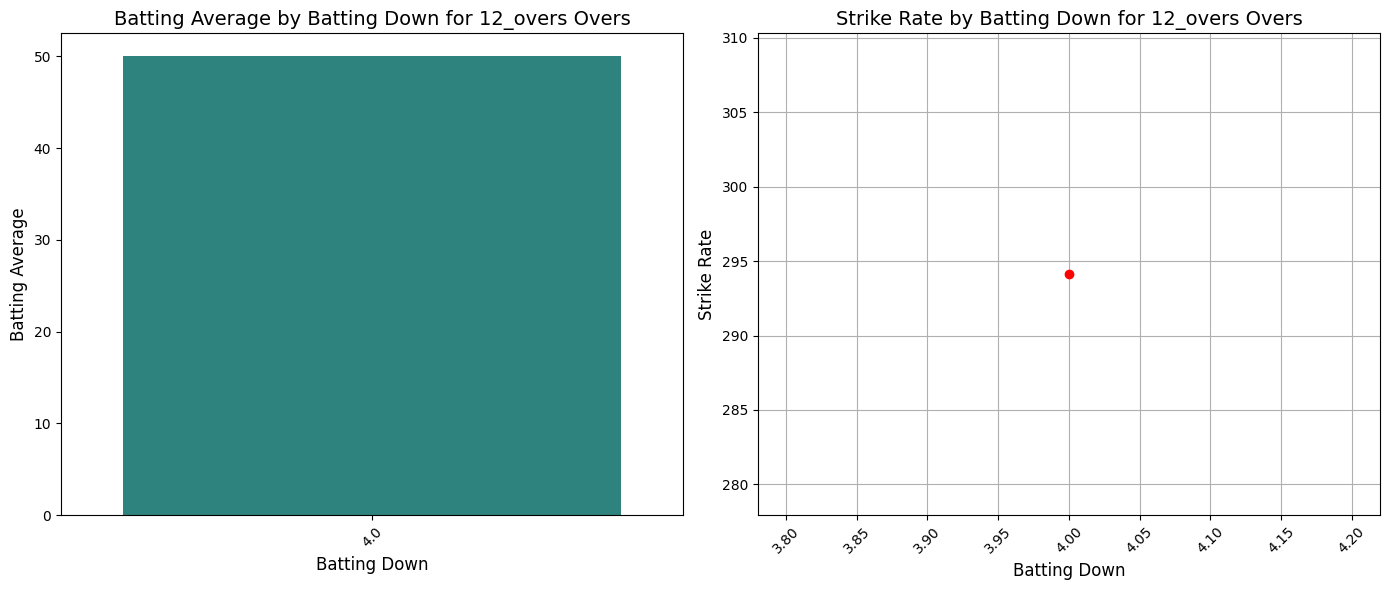

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


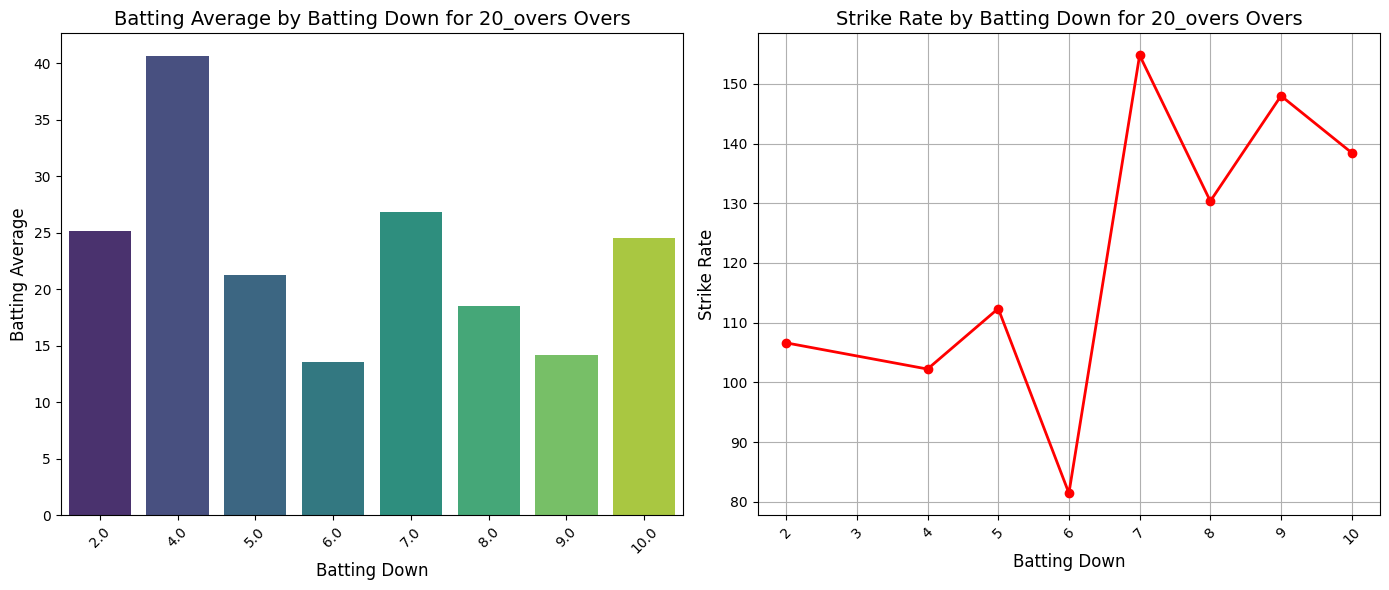

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


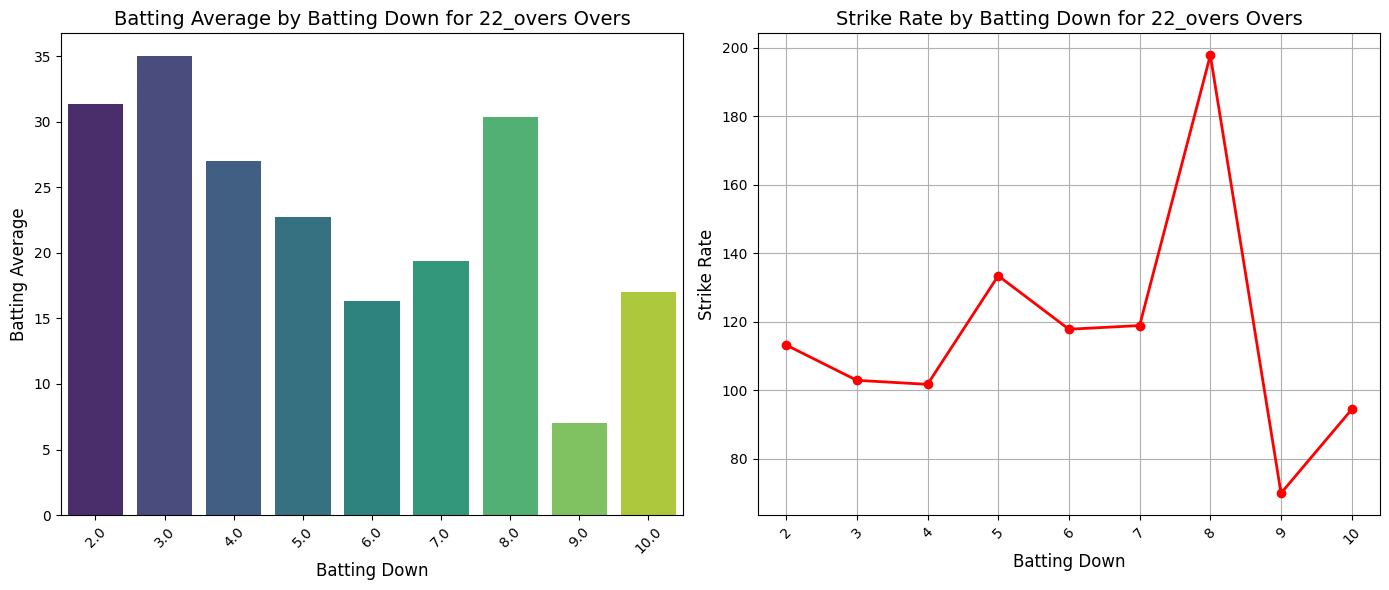

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


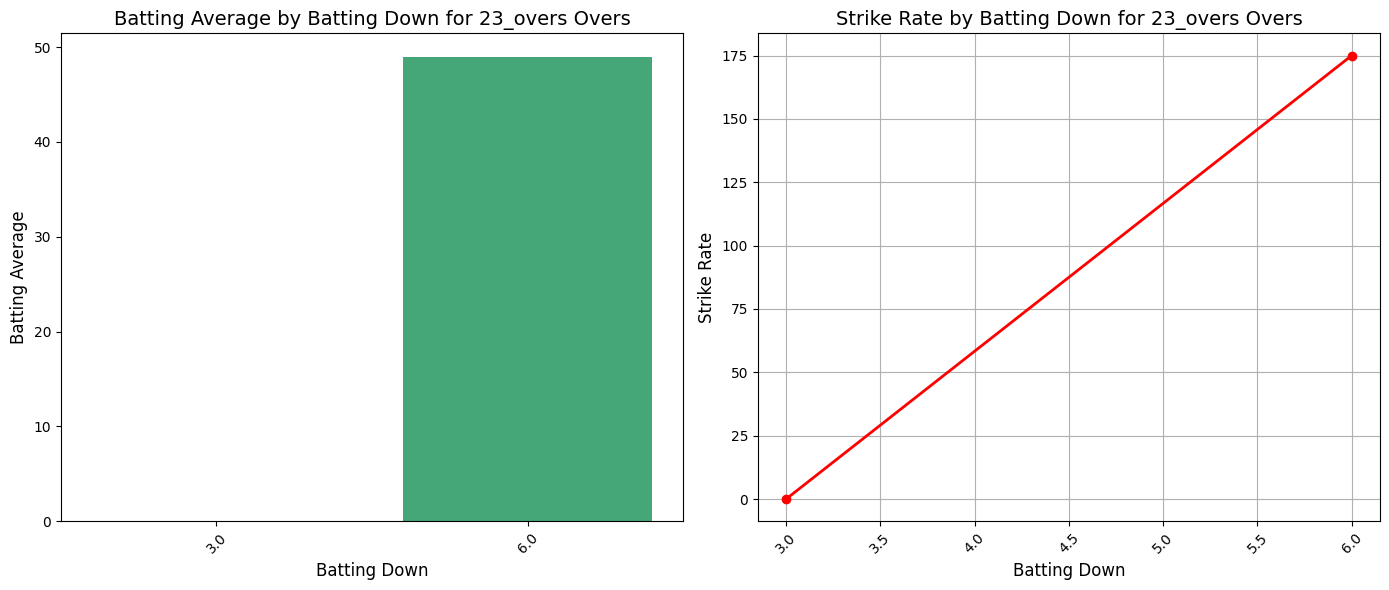

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


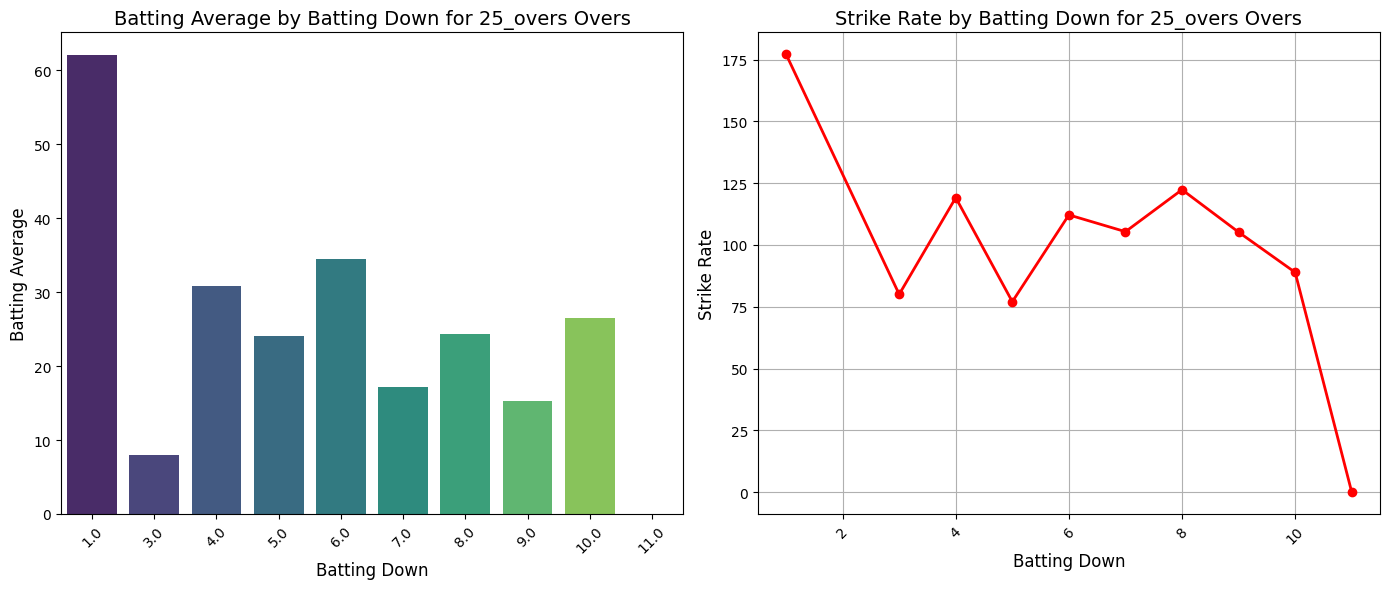

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


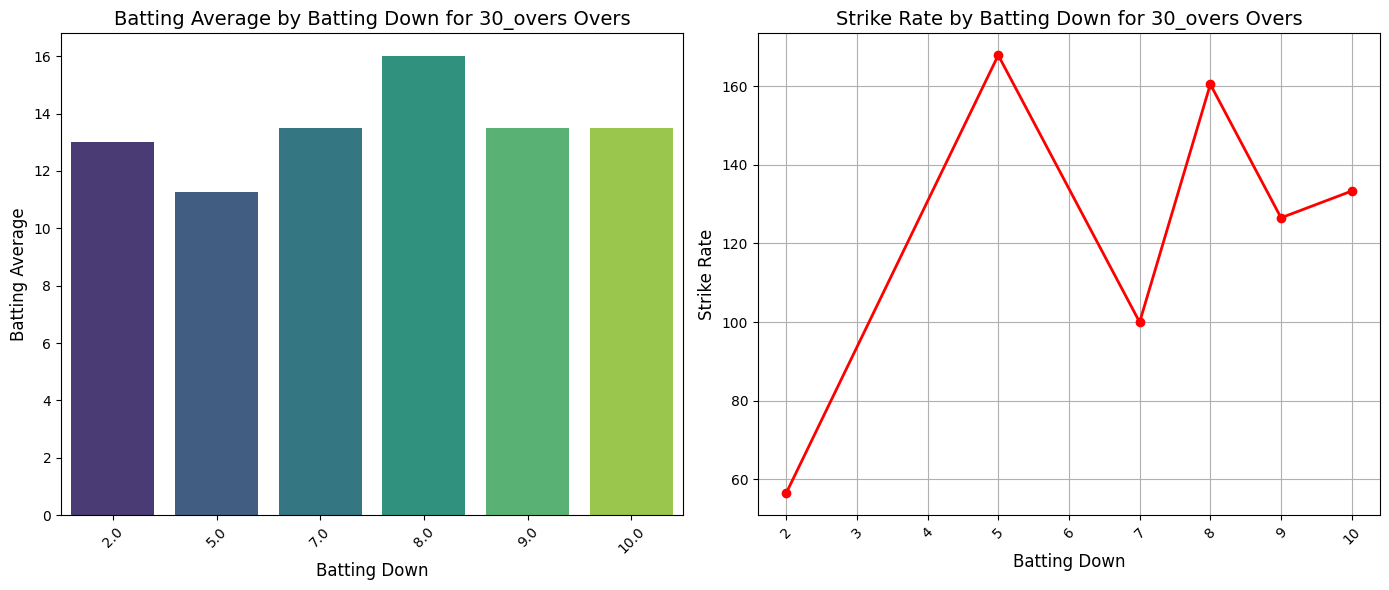

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


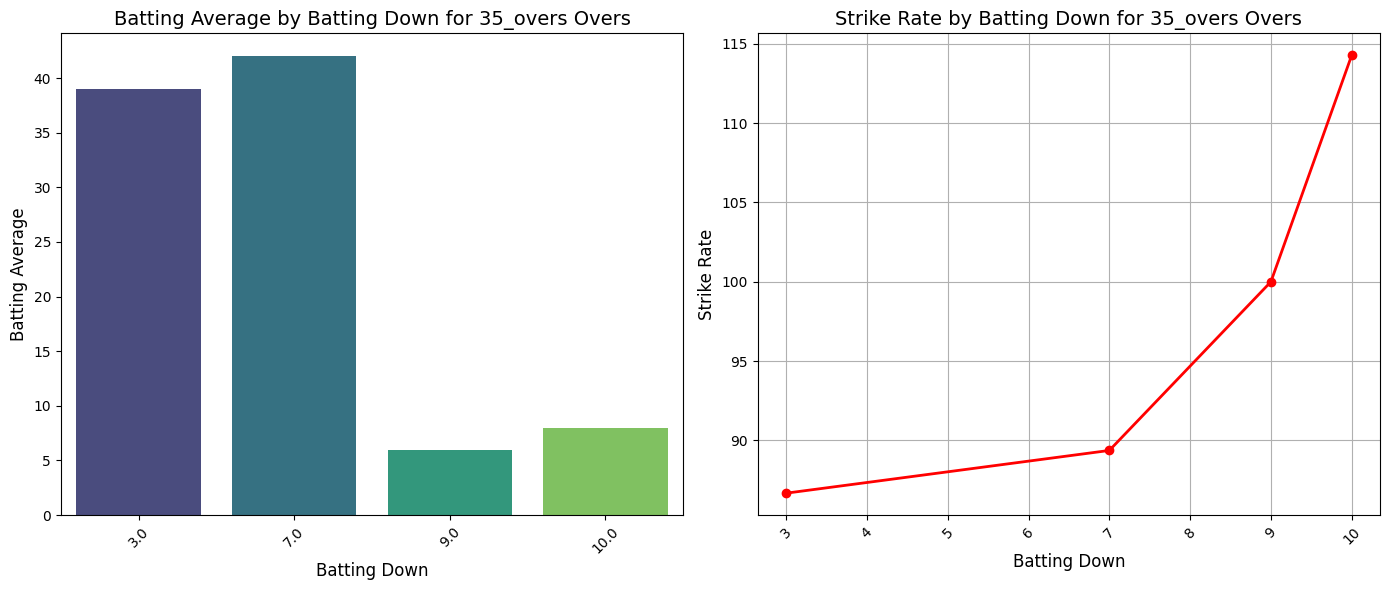

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


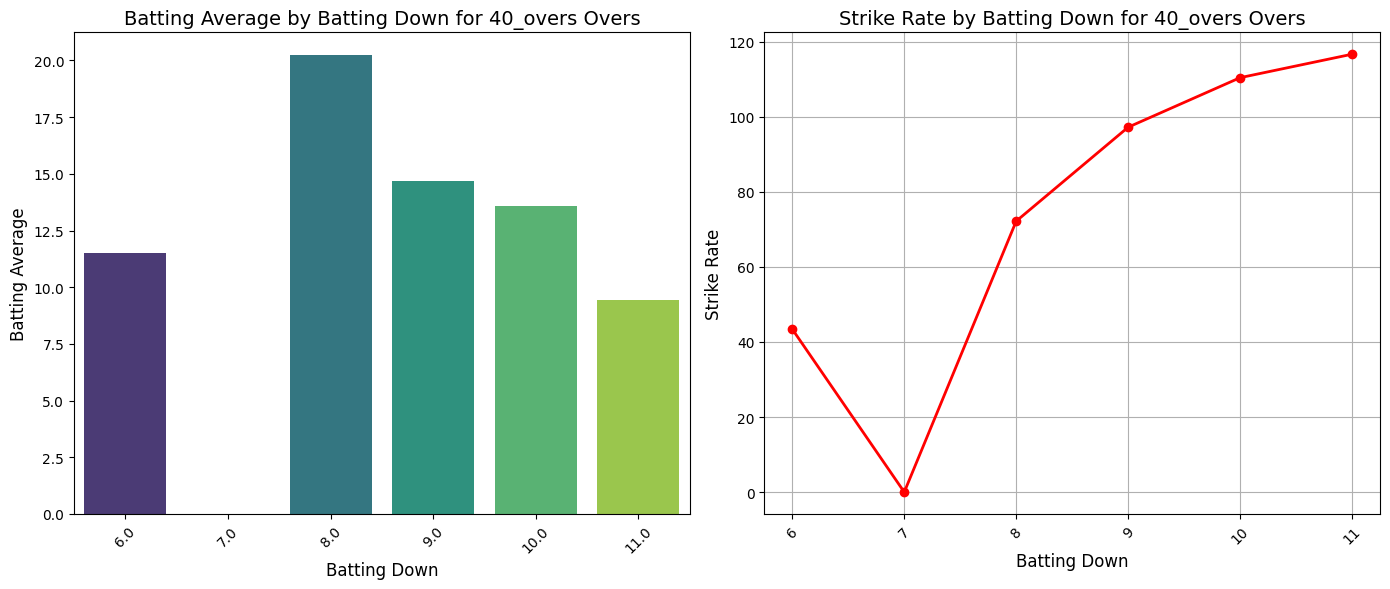

<ipython-input-46-7876cf4c0b05>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")


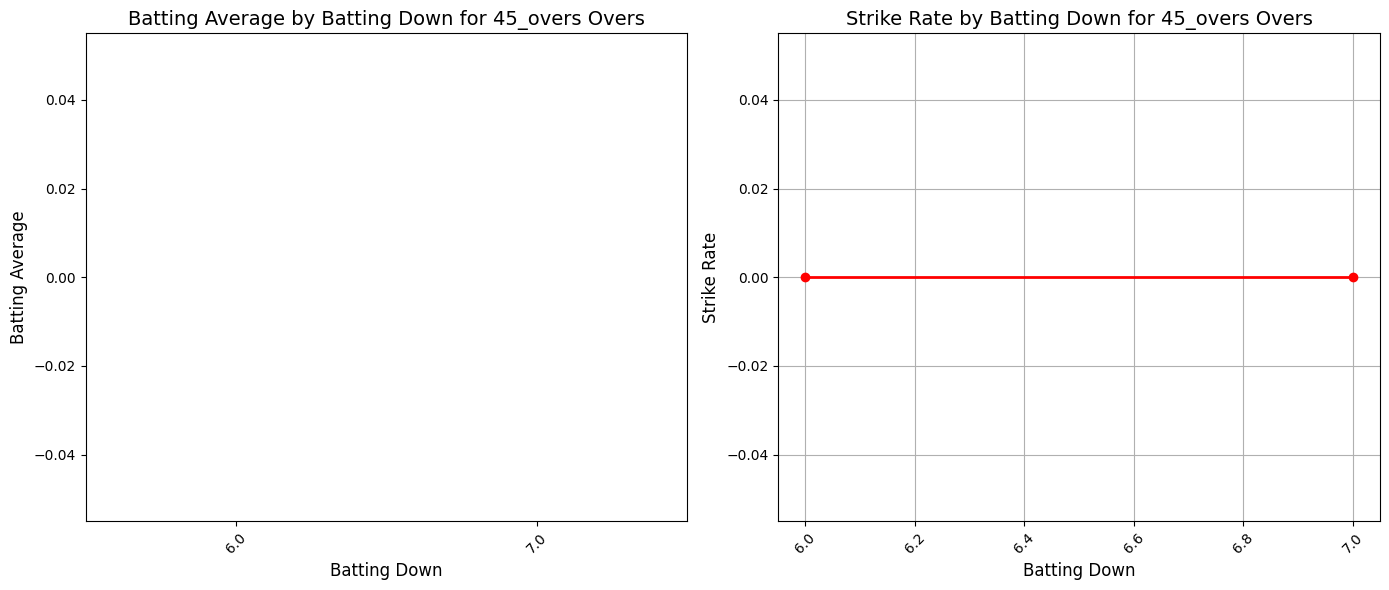

In [46]:
for overs, df in dataframes.items():
    plt.figure(figsize=(14, 6))

    # Subplot 1: Bar graph for Batting Average
    plt.subplot(1, 2, 1)
    sns.barplot(x=df.index, y=df['Batting Average'], palette="viridis")
    plt.title(f'Batting Average by Batting Down for {overs} Overs', fontsize=14)
    plt.xlabel('Batting Down', fontsize=12)
    plt.ylabel('Batting Average', fontsize=12)
    plt.xticks(rotation=45)

    # Subplot 2: Line graph for Strike Rate
    plt.subplot(1, 2, 2)
    plt.plot(df.index, df['Strike Rate'], color='red', marker='o', linestyle='-', linewidth=2)
    plt.title(f'Strike Rate by Batting Down for {overs} Overs', fontsize=14)
    plt.xlabel('Batting Down', fontsize=12)
    plt.ylabel('Strike Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

One thing is clear after seeing the statistics of the relationship between the batting downs and formats played: i.e the player understands the situation very well. He has been greatly underutilized by the teams not realising his capabilities to bat at 2,3 and 5 downs. In each and every format, batsman tries to take the responsibilty of the game on his own shoulders, but regular changes in his batting positions isn't helping him, rather creating a havoc in his batting averages and strike rates.

# **Teams, Batting Positions and Statistics**

In [47]:
down_team_relation.head(2)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,batting_down,team_played_for,overs,Total Runs Scored,Number of Innings,Batting Average,Innings_out_no,Total Balls Taken,Strike Rate
0,1.0,WEST DELHI CRICKET CLUB WDCC,25,62.0,1,62.0,1,35.0,177.142857
1,2.0,CHANDIGARH SINGHS (SPL),20,1.0,1,1.0,1,6.0,16.666667


In [81]:
# Step 1: Calculate the value counts of 'batting_down' grouped by 'team_played_for' and 'overs'
batting_down_counts = down_team_relation.groupby(['team_played_for', 'overs'])['batting_down'].value_counts().reset_index(name='Count')

# Step 2: Calculate the batting averages and strike rates for each combination of 'team_played_for', 'batting_down', and 'overs'
batting_stats = down_team_relation.groupby(['team_played_for', 'batting_down', 'overs']).agg(
    {
        'Batting Average': 'mean',
        'Strike Rate': 'mean'
    }
).reset_index()

# Step 3: Merge the batting stats with the batting down counts
merged_df = pd.merge(batting_down_counts, batting_stats, on=['team_played_for', 'batting_down', 'overs'])

# Step 4: Calculate the maximum Batting Average for each team
team_max_batting_avg = merged_df.groupby('team_played_for')['Batting Average'].max().reset_index(name='Max Batting Average')

# Step 5: Merge the max batting average back to the original DataFrame
merged_df = pd.merge(merged_df, team_max_batting_avg, on='team_played_for')

# Step 6: Sort by 'Max Batting Average' first, keeping teams together, and then by 'Batting Average' within each team
sorted_df = merged_df.sort_values(by=['Max Batting Average', 'team_played_for', 'Batting Average'], ascending=[False, True, False])

# Step 7: Drop the 'Max Batting Average' column as it was just for sorting purposes
sorted_df = sorted_df.drop(columns=['Max Batting Average'])

# Step 8: Display the sorted DataFrame
sorted_df



/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,team_played_for,overs,batting_down,Count,Batting Average,Strike Rate
5,BUTLER CRICKET 11,30,5.0,1,inf,235.714286
4,BUTLER CRICKET 11,30,8.0,1,5.000000,166.666667
3,BUTLER CRICKET 11,25,5.0,1,4.000000,57.142857
7,BUTLERINS XI,30,10.0,1,inf,133.333333
8,BUTLERINS XI,30,8.0,1,27.000000,154.285714
9,BUTLERINS XI,30,5.0,1,9.000000,100.000000
6,BUTLERINS XI,25,7.0,1,6.000000,120.000000
11,DELHI KHALSA WARRIER,20,6.0,1,inf,80.000000
14,FRIEND CLUB 11,40,10.0,1,inf,112.500000
23,MAHADEV BAKHTS,20,7.0,1,inf,226.666667


In [49]:
df_batting['team_played_for'].value_counts()

,count
team_played_for,
WEST DELHI CRICKET CLUB WDCC,82
SCZ 11,15
SINGH'S XI,13
XI MUSKETEERS,7
BUTLERINS XI,6
WHITE WALKERS (XI),5
WEST DELHI CRICKET ACADEMY (HARINAGAR),5
THIRTY1 CRICKET CLUB,5
WEST TOWN PANTHERS,5


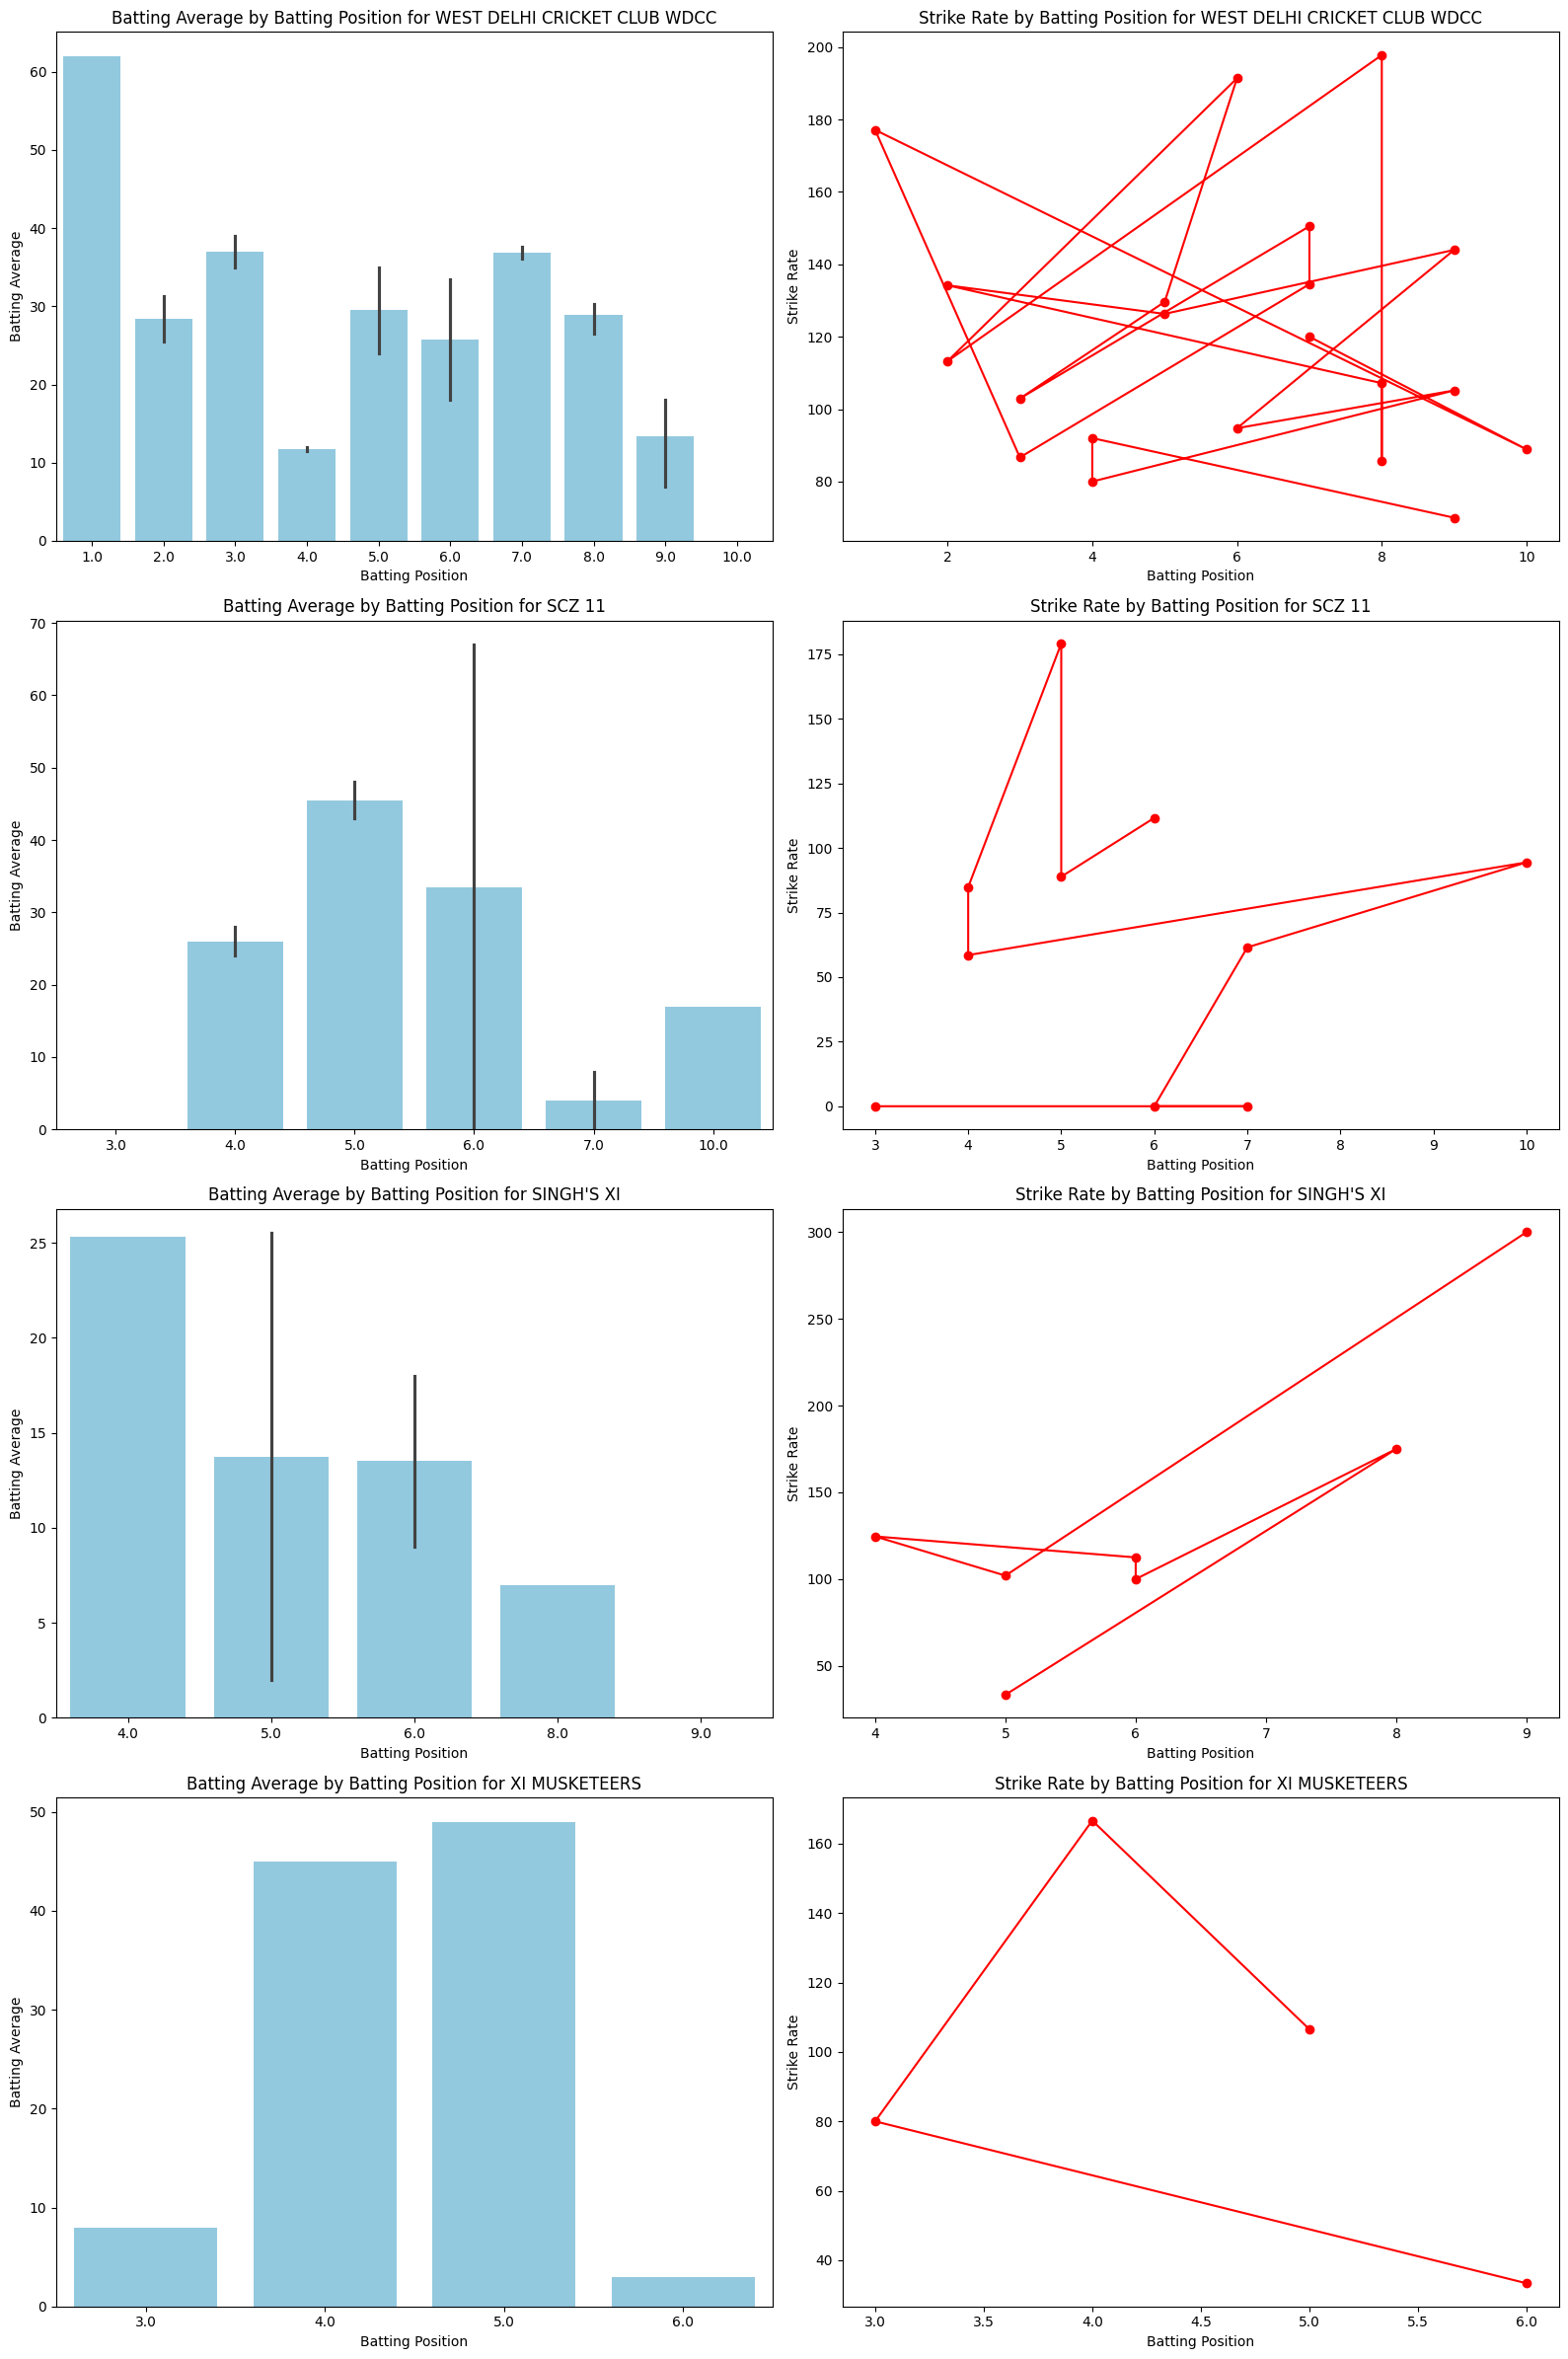

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of teams
teams = ["WEST DELHI CRICKET CLUB WDCC", "SCZ 11", "SINGH'S XI", "XI MUSKETEERS"]

# Set up the figure size with subplots (2 rows for each team: one for Batting Average, one for Strike Rate)
fig, axes = plt.subplots(len(teams), 2, figsize=(16, len(teams) * 6))

# Loop through each team and create the plots
for i, team in enumerate(teams):
    # Filter the data for the current team
    team_data = sorted_df[sorted_df['team_played_for'] == team]

    # Bar plot for Batting Average by batting position
    sns.barplot(ax=axes[i, 0], x='batting_down', y='Batting Average', data=team_data, color='skyblue')
    axes[i, 0].set_title(f'Batting Average by Batting Position for {team}')
    axes[i, 0].set_xlabel('Batting Position')
    axes[i, 0].set_ylabel('Batting Average')

    # Line plot for Strike Rate by batting position
    axes[i, 1].plot(team_data['batting_down'], team_data['Strike Rate'], color='red', marker='o')
    axes[i, 1].set_title(f'Strike Rate by Batting Position for {team}')
    axes[i, 1].set_xlabel('Batting Position')
    axes[i, 1].set_ylabel('Strike Rate')

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



# **Ground Wise Performance**

In [50]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,...,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings,year
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,...,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1,2018
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,...,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1,2019


In [51]:
matches_per_ground = df_batting['game_id'].value_counts()
matches_per_ground.head(5)

,count
game_id,
Telefunken Ground,46
Ghevra Cricket Ground,11
Six Flag 2.0 (Gurugram),8
HarCourt Butler School Mandir Marg,6
Shivaji Collage Ground,4


In [52]:
# Step 1: Group the data by 'game_id'
# Since 'overs' might contain multiple values per game_id, we'll use a list or some other meaningful aggregation method
grouped_by_ground = df_batting.groupby('game_id').agg({
    'runs_scored': 'sum',            # Sum of runs scored at each ground
    'innings': 'sum',                # Sum of innings where the player was out at each ground
    'overs': lambda x: x.iloc[0]     # Keep the first 'overs' value or use a different aggregation method
}).reset_index()

# Step 2: Calculate the batting average for each ground
grouped_by_ground['Batting Average'] = grouped_by_ground['runs_scored'] / grouped_by_ground['innings']

# Step 3: Handle cases where 'innings' is zero (to avoid division by zero)
grouped_by_ground['Batting Average'] = grouped_by_ground['Batting Average'].replace([np.inf, -np.inf], np.nan)

# Step 4: Display the resulting DataFrame with batting averages for each ground
grounds_grouping = grouped_by_ground.sort_values(by='Batting Average', ascending=False)

# Display the DataFrame
grounds_grouping

,game_id,runs_scored,innings,overs,Batting Average
75,Sri Krishna Acadmy,143.0,1,20,143.000000
8,Baprolla,72.0,1,22,72.000000
38,Hari Kishan Cricket Ground,66.0,1,20,66.000000
84,The Ballpark Cricket Ground,52.0,1,20,52.000000
34,Guru Nanak Higher Secondary School,50.0,1,12,50.000000
73,Six Flag 2.0 (Gurugram),290.0,6,20,48.333333
52,Mcg3,45.0,1,25,45.000000
69,Shivaji Collage Ground,88.0,2,25,44.000000
58,Outer Ghevra Cricket Ground,42.0,1,35,42.000000
46,MCG -1 Mundka Dabas Cricket Ground,41.0,1,25,41.000000


In [53]:
# Filter out rows where 'Batting Average' is NaN
filtered_grounds_grouping = grounds_grouping.dropna(subset=['Batting Average'])

# Get the last 5 rows of the filtered DataFrame
result = filtered_grounds_grouping.tail(5)

# Display the result
result.tail(5)

,game_id,runs_scored,innings,overs,Batting Average
60,Rajokari 8285110005,0.0,1,20,0.0
20,County Sports cricket grounds,0.0,2,25,0.0
90,Unique Sports Ground (Delhi),0.0,1,22,0.0
31,Green Field,0.0,1,23,0.0
63,Rising Star Ground,0.0,1,45,0.0


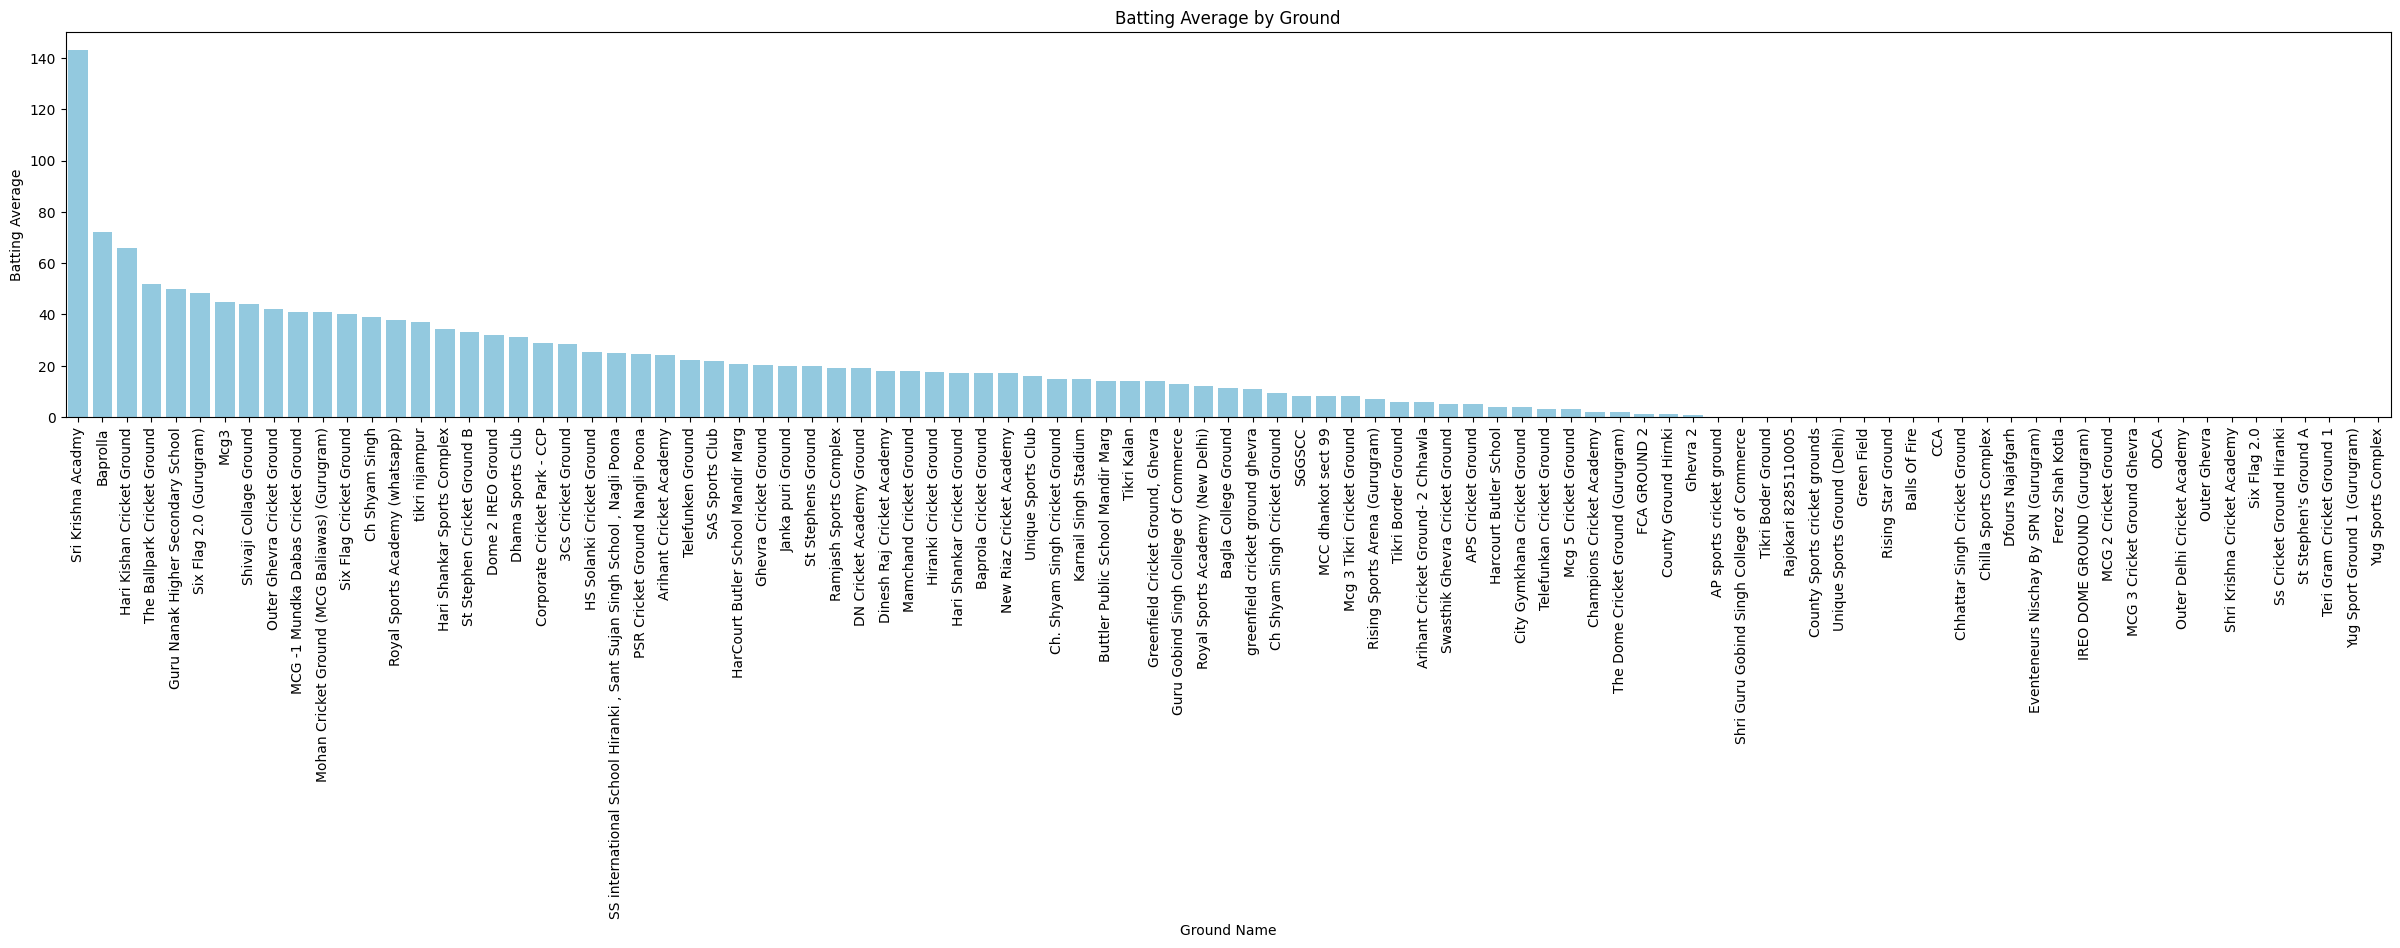

In [90]:
# Step 1: Group the data by 'game_id'
grouped_by_ground = df_batting.groupby('game_id').agg({
    'runs_scored': 'sum',            # Sum of runs scored at each ground
    'innings': 'sum',                # Sum of innings where the player was out at each ground
    'overs': lambda x: x.iloc[0]     # Keep the first 'overs' value or use a different aggregation method
}).reset_index()

# Step 2: Calculate the batting average for each ground
grouped_by_ground['Batting Average'] = grouped_by_ground['runs_scored'] / grouped_by_ground['innings']

# Step 3: Handle cases where 'innings' is zero (to avoid division by zero)
grouped_by_ground['Batting Average'] = grouped_by_ground['Batting Average'].replace([np.inf, -np.inf], np.nan)

# Step 4: Sort the DataFrame by batting average
grounds_grouping = grouped_by_ground.sort_values(by='Batting Average', ascending=False)

# Step 5: Plot the batting average for each ground
plt.figure(figsize=(30, 5))  # Increased figure size
sns.barplot(x='game_id', y='Batting Average', data=grounds_grouping, color='skyblue')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Ground Name')
plt.ylabel('Batting Average')
plt.title('Batting Average by Ground')

# Display the plot
plt.show()

# **Batsman against bowlers type and dismissals type**

In [54]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,...,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings,year
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,...,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1,2018
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,...,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1,2019


In [55]:
df_batting['how_out'].value_counts()

,count
how_out,
c,68
not out,53
b,30
lbw,10
st,8
c&b,5
run out,5
retired,3


In [56]:
# Group by 'bowler_type' and 'how_out' and count occurrences
grouped_data = df_batting.groupby(['bowler_type', 'how_out']).size().reset_index(name='count')

# Pivot the table to have 'how_out' as columns and 'bowler_type' as rows
pivot_table = grouped_data.pivot(index='bowler_type', columns='how_out', values='count').fillna(0)

# Calculate the total count for each 'bowler_type'
pivot_table['Total'] = pivot_table.sum(axis=1)

# Display the resulting pivot table with totals
pivot_table.sort_values(by = 'Total', ascending = False)

how_out,b,c,c&b,lbw,retired,st,Total
bowler_type,,,,,,,
Right-arm medium,15.0,32.0,1.0,3.0,2.0,0.0,53.0
Right-arm Off Break,4.0,14.0,1.0,1.0,0.0,3.0,23.0
Right-arm fast,4.0,5.0,1.0,1.0,0.0,3.0,14.0
Right-arm Leg Break,2.0,5.0,2.0,1.0,0.0,1.0,11.0
Slow left-arm orthodox,3.0,3.0,0.0,0.0,0.0,1.0,7.0
Slow left-arm chinaman,0.0,4.0,0.0,0.0,0.0,0.0,4.0
Left-arm medium,1.0,1.0,0.0,0.0,0.0,0.0,2.0


<ipython-input-57-19f0bc422759>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bowler_type', y='Total', data=pivot_table_reset, palette='viridis')


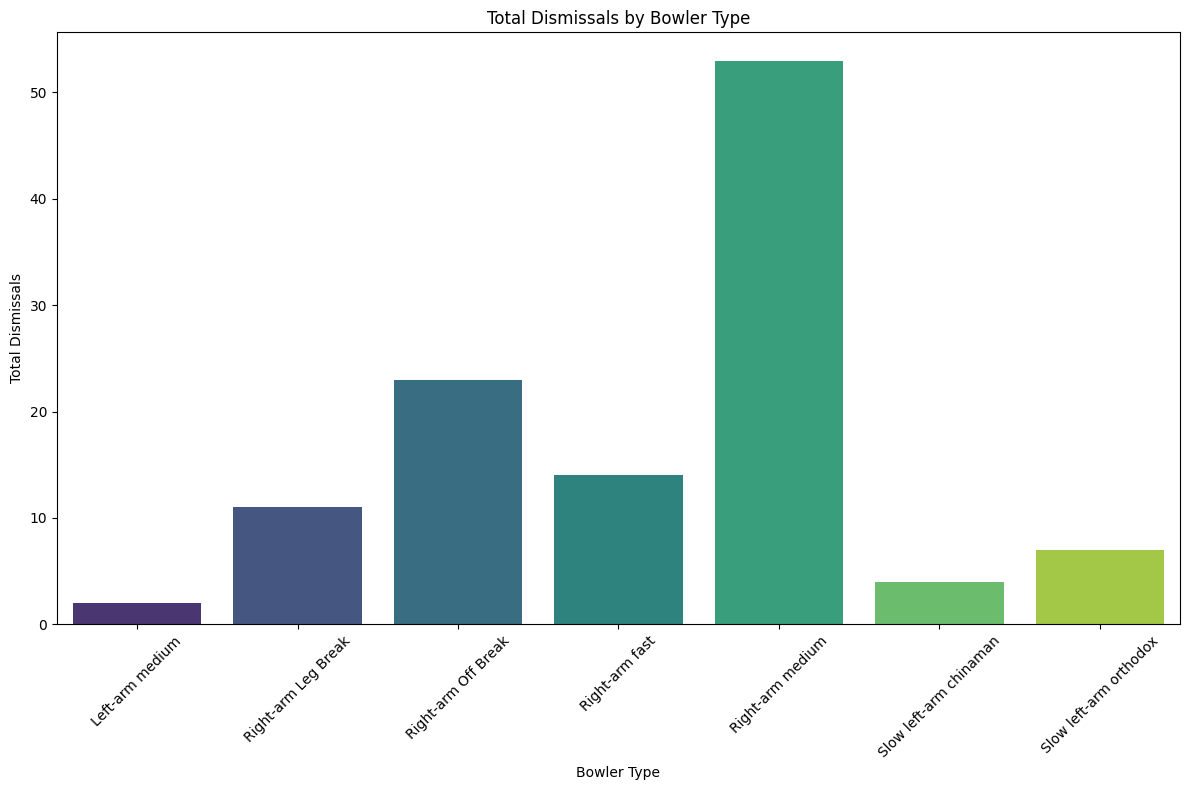

In [57]:
# Assuming 'pivot_table' is your DataFrame with totals
# Reset index to use 'bowler_type' as a column
pivot_table_reset = pivot_table.reset_index()

# Plotting the total dismissals by bowler type
plt.figure(figsize=(12, 8))
sns.barplot(x='bowler_type', y='Total', data=pivot_table_reset, palette='viridis')

# Adding title and labels
plt.title('Total Dismissals by Bowler Type')
plt.xlabel('Bowler Type')
plt.ylabel('Total Dismissals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

# **Fantasy Performance by the Player**

In [58]:
df_batting.head(2)

,game_id,date,time,game_id_2,overs,player_name,team_played_for,team_played_against,batting_down,runs_scored,...,fours,sixes,strike_rate,minutes_played,how_out,out_against_bowler,bowler_type,bowler_profile,innings,year
1,DN Cricket Academy Ground,2018-06-18,10:01:00,DN Cricket Academy Ground_43269_0.417361111111111,40,prabhjot,HARI NAGAR TIGERS,NARU LIONS,9.0,19.0,...,0.0,1.0,105.56,0.0,c,sachin kushwaha,Right-arm Leg Break,https://cricheroes.com/player-profile/303683/s...,1,2018
2,Ghevra Cricket Ground,2019-05-11,11:46:00,Ghevra Cricket Ground_43596_0.490277777777778,30,prabhjot,WEST DELHI CRICKET ACADEMY (HARINAGAR),DELHI SUNRISE C.A,2.0,13.0,...,1.0,0.0,56.52,37.0,c,ashish meena,Slow left-arm chinaman,https://cricheroes.com/player-profile/2638579/...,1,2019


In [59]:
df_batting.columns

Index(['game_id', 'date', 'time', 'game_id_2', 'overs', 'player_name',
       'team_played_for', 'team_played_against', 'batting_down', 'runs_scored',
       'balls_taken', 'fours', 'sixes', 'strike_rate', 'minutes_played',
       'how_out', 'out_against_bowler', 'bowler_type', 'bowler_profile',
       'innings', 'year'],
      dtype='object')

In [60]:
fantasy_data = df_batting.drop(columns = ['date', 'time', 'player_name', 'minutes_played', 'bowler_profile', 'game_id_2', 'out_against_bowler', 'year'])

In [61]:
fantasy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              199 non-null    object 
 1   overs                199 non-null    int64  
 2   team_played_for      199 non-null    object 
 3   team_played_against  199 non-null    object 
 4   batting_down         182 non-null    float64
 5   runs_scored          182 non-null    float64
 6   balls_taken          182 non-null    float64
 7   fours                182 non-null    float64
 8   sixes                182 non-null    float64
 9   strike_rate          182 non-null    float64
 10  how_out              182 non-null    object 
 11  bowler_type          114 non-null    object 
 12  innings              199 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 21.8+ KB


In [62]:
fantasy_data['batting_average'] = fantasy_data['runs_scored']/fantasy_data['innings']

In [63]:
fantasy_data['runs_scored'].fillna(fantasy_data['runs_scored'].mean(), inplace = True)
fantasy_data['balls_taken'].fillna(fantasy_data['balls_taken'].mean(), inplace = True)
fantasy_data['fours'].fillna(fantasy_data['fours'].mean(), inplace = True)
fantasy_data['sixes'].fillna(fantasy_data['sixes'].mean(), inplace = True)
fantasy_data['strike_rate'].fillna(fantasy_data['strike_rate'].mean(), inplace = True)
fantasy_data['batting_average'].fillna(fantasy_data['batting_average'].mean(), inplace = True)
fantasy_data['bowler_type'].fillna(fantasy_data['bowler_type'].mode()[0], inplace = True)
fantasy_data['batting_down'].fillna(fantasy_data['batting_down'].mode()[0], inplace = True)
# Generate random choices from existing categories
def fillna_with_random_choices(df, column):
    unique_values = df[column].dropna().unique()
    nans = df[column].isna()
    random_choices = np.random.choice(unique_values, size=nans.sum())
    df.loc[nans, column] = random_choices

# Apply the function to your DataFrame and column
fillna_with_random_choices(fantasy_data, 'how_out')

In [64]:
fantasy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              199 non-null    object 
 1   overs                199 non-null    int64  
 2   team_played_for      199 non-null    object 
 3   team_played_against  199 non-null    object 
 4   batting_down         199 non-null    float64
 5   runs_scored          199 non-null    float64
 6   balls_taken          199 non-null    float64
 7   fours                199 non-null    float64
 8   sixes                199 non-null    float64
 9   strike_rate          199 non-null    float64
 10  how_out              199 non-null    object 
 11  bowler_type          199 non-null    object 
 12  innings              199 non-null    int64  
 13  batting_average      199 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 23.3+ KB


In [65]:
fantasy_data['batting_average'].replace([np.inf, -np.inf], np.nan, inplace=True)
fantasy_data['batting_average'].fillna(fantasy_data['batting_average'].mean(), inplace=True)

In [66]:
fantasy_data.rename(columns = {'game_id' : 'ground_name'}, inplace = True)

In [67]:
fantasy_data.sample(5)

,ground_name,overs,team_played_for,team_played_against,batting_down,runs_scored,balls_taken,fours,sixes,strike_rate,how_out,bowler_type,innings,batting_average
50,HarCourt Butler School Mandir Marg,25,BUTLERINS XI,LB SHASTRI COCHING CENTRECLUB,7.0,6.0,5.0,1.0,0.0,120.00,b,Right-arm medium,1,6.000000
218,Ghevra Cricket Ground,20,SCZ 11,SCOPE SPORTS SQUAD,6.0,0.0,1.0,0.0,0.0,0.00,lbw,Right-arm medium,1,0.000000
5,ODCA,30,WEST DELHI CRICKET ACADEMY (HARINAGAR),GYAN MANDIR CRICKET ACADEMY,7.0,6.0,6.0,1.0,0.0,100.00,not out,Right-arm medium,0,18.457364
153,Telefunken Ground,22,WEST DELHI CRICKET CLUB WDCC,DANGER ELEVEN,9.0,0.0,1.0,0.0,0.0,0.00,not out,Right-arm medium,0,18.457364
209,Six Flag 2.0 (Gurugram),20,HAWABAZZ 11,VINTAGE VIKINGS,7.0,46.0,30.0,4.0,1.0,153.33,c,Right-arm medium,1,46.000000


In [68]:
fantasy_data.columns

Index(['ground_name', 'overs', 'team_played_for', 'team_played_against',
       'batting_down', 'runs_scored', 'balls_taken', 'fours', 'sixes',
       'strike_rate', 'how_out', 'bowler_type', 'innings', 'batting_average'],
      dtype='object')

In [69]:
fantasy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 231
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ground_name          199 non-null    object 
 1   overs                199 non-null    int64  
 2   team_played_for      199 non-null    object 
 3   team_played_against  199 non-null    object 
 4   batting_down         199 non-null    float64
 5   runs_scored          199 non-null    float64
 6   balls_taken          199 non-null    float64
 7   fours                199 non-null    float64
 8   sixes                199 non-null    float64
 9   strike_rate          199 non-null    float64
 10  how_out              199 non-null    object 
 11  bowler_type          199 non-null    object 
 12  innings              199 non-null    int64  
 13  batting_average      199 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 23.3+ KB


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.utils import to_categorical

# Load your data
# fantasy_data = pd.read_csv('your_data.csv')  # Replace with your data source

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['ground_name', 'team_played_for', 'team_played_against', 'bowler_type', 'how_out']
for col in categorical_columns:
    le = LabelEncoder()
    fantasy_data[col] = le.fit_transform(fantasy_data[col])
    label_encoders[col] = le

# Define features and target variables
X = fantasy_data[['ground_name', 'overs', 'team_played_for', 'team_played_against', 'batting_down', 'bowler_type']]
y = fantasy_data[['batting_average', 'runs_scored', 'strike_rate', 'balls_taken']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4))  # Output layer for 4 continuous values

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
predictions = model.predict(X_test)

# Convert predictions to a DataFrame for better readability
predicted_df = pd.DataFrame(predictions, columns=['batting_average', 'runs_scored', 'strike_rate', 'balls_taken'])

print(predicted_df.head())


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3800.0449 - val_loss: 3932.5459
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3509.0110 - val_loss: 3502.7007
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3098.9790 - val_loss: 3126.9126
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2445.4231 - val_loss: 2761.6772
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2152.5730 - val_loss: 2425.0261
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1688.5737 - val_loss: 2142.3484
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1373.4106 - val_loss: 1944.4866
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1413.4607 - val_loss: 1830.0416
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1093.9609 - val_loss: 1786.6787
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1253.1215 - val_loss: 1769.8616
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1250.5526 - val_loss: 1767.8474
Epoch 12/50
5/5 ━━━━━━━━━━━

In [71]:
# Assume you have new input data as a DataFrame
new_data = pd.DataFrame({
    'ground_name': ['Six Flag 2.0'],
    'overs': [20],
    'team_played_for': ['SCZ 11'],
    'team_played_against': ['RCC X2'],
    'batting_down': [4],
    'bowler_type': ['Right-arm medium']
})

# Encode the new data
for col in categorical_columns:
    if col in new_data.columns:
        new_data[col] = label_encoders[col].transform(new_data[col])

# Predict using the trained model
predictions = model.predict(new_data)

# Convert predictions to a DataFrame for better readability
predicted_df = pd.DataFrame(predictions, columns=['batting_average', 'runs_scored', 'strike_rate', 'balls_taken'])

print(predicted_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
   batting_average  runs_scored  strike_rate  balls_taken
0        17.454485    16.022558     97.49453     13.66704


In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Absolute Error: 24.74252090532831
Mean Squared Error: 2077.2558269875467
R-squared: -0.17467881513769118
